Import the necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Load the image and display the original image

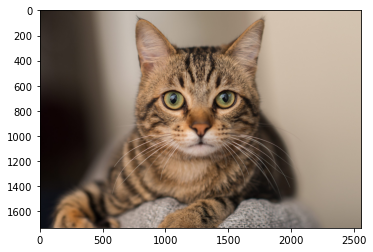

In [2]:
%matplotlib inline

img = plt.imread('cat.jpg')
plt.imshow(img)

We will do the following modifications to the image:
1. Crop the image
2. Resize the image
3. Rotate the image
4. Flip the image

##### 1. Crop Image

In [4]:
img.shape # original image shape

(1731, 2560, 3)

Let's crop the image to 1200x2000 pixels starting from the top left corner

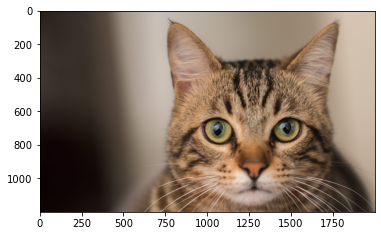

In [22]:
crop_x, crop_y = 1200, 2000
img_crop = img[:crop_x, :crop_y, :]
plt.imshow(img_crop)

Let's crop the image to 1200x2000 pixels starting from the center

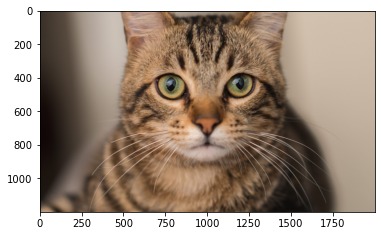

In [23]:
x, y, z = img.shape # original image shape
center_x, center_y = x // 2, y // 2
img_crop = img[center_x - crop_x // 2: center_x + crop_x // 2, center_y - crop_y // 2: center_y + crop_y // 2, :]
plt.imshow(img_crop)

##### 2. Resize the image

Let's write a function to resize the images

In [46]:
def resize(img, w, h):
    rows, cols, _ = img.shape
    img_resized = []

    for r in range(w):
        i = []
        for c in range(h):
            i.append(img[int(rows*r / w)][int(cols*c / h)])
        img_resized.append(i)

    img_resized = np.array(img_resized)
    return img_resized

Resize the image to 700X1500 pixels

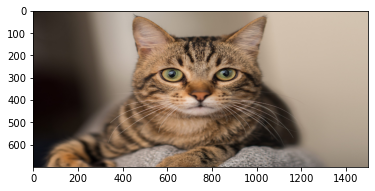

In [47]:
new_x, new_y = 700, 1500
img_resized = resize(img, new_x, new_y)
plt.imshow(img_resized)

Let's increase the size of the image morethan it were before.

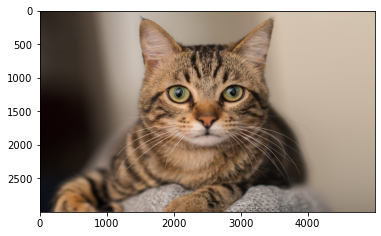

In [61]:
new_x, new_y = 3000, 5000
img_resized = resize(img, new_x, new_y)
plt.imshow(img_resized)

##### 3. Rotate the image

Let's write a function to rotate the image

In [126]:
def rotate(img, angle):
    rows, cols, _ = img.shape
    img_rotated = np.zeros((rows, cols, 3), dtype=np.uint8)
    # let me pre initialize the cos and sin variable to increase the performance of this function.
    cos_a = np.cos(angle)
    sin_a = np.sin(angle)
    for r in range(rows):
        for c in range(cols):
            x = r - rows // 2
            y = c - cols // 2
            # The below two lines are the linear algebra parts.
            x_new = x * cos_a - y * sin_a
            y_new = x * sin_a + y * cos_a
            x_new = int(x_new + rows // 2)
            y_new = int(y_new + cols // 2)
            if x_new >= 0 and x_new < rows and y_new >= 0 and y_new < cols:
                img_rotated[r][c] = img[x_new][y_new]

    return img_rotated

Let's test the function. Let's rotate the image 180 degrees first

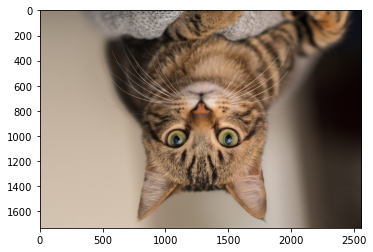

In [127]:
angle180 = np.pi
img_rotated = rotate(img, angle180)
plt.imshow(img_rotated)

Let's rotate the image 60 degrees

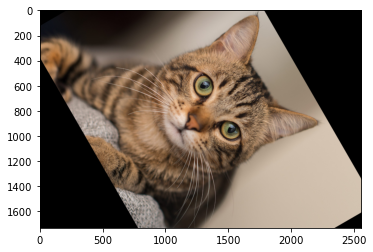

In [128]:
angle60 = np.pi / 3
img_rotated = rotate(img, angle60)
plt.imshow(img_rotated)

##### 4. Flip the image

Let's define the flipping function

In [147]:
def flip(img):
    rows, cols, _ = img.shape
    img_flipped = np.zeros((rows, cols, 3), dtype=np.uint8)
    for r in range(rows):
        for c in range(cols):
            img_flipped[r][c] = img[r][cols - c - 1]

    return img_flipped

Let's try to flip the image

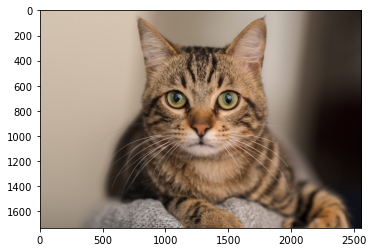

In [148]:
img_flip = flip(img)
plt.imshow(img_flip)